# Country

## Referencxe

In [71]:
# https://www.kaggle.com/datasets/rohan0301/unsupervised-learning-on-country-data?select=Country-data.csv

## Import Libraries

In [72]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import kmeans_plusplus, KMeans
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import f_classif
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder, StandardScaler

## Import Data

In [73]:

# Dataset Column Overview: 
# ------------------------------------------------------------------------------

#  y: country	Name of the country
# X1: child_mort	Death of children under 5 years of age per 1000 live births
# X2: exports	Exports of goods and services per capita. Given as %age of the GDP per capita
# X3: health	Total health spending per capita. Given as %age of GDP per capita
# X4: imports	Imports of goods and services per capita. Given as %age of the GDP per capita
# X5: Income	Net income per person
# X6: Inflation	The measurement of the annual growth rate of the Total GDP
# X7: life_expec	The average number of years a new born child would live if the current mortality patterns are to remain the same
# X8: total_fer	The number of children that would be born to each woman if the current age-fertility rates remain the same.
# X9: gdpp	The GDP per capita. Calculated as the Total GDP divided by the total population



path = 'https://raw.githubusercontent.com/notfakearcher/julian/main/02_data/country_data.csv'
country = pd.read_csv(path)
country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [74]:
country.isna().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

## Normalize the data 

In [75]:
country1 =  country.copy()

# change the country name to label type
lab = LabelEncoder()
object_columns = country1.select_dtypes('object').columns
country1[object_columns] = country1[object_columns].apply(lab.fit_transform)


In [76]:
# normalize the data
std = StandardScaler()
country1 = std.fit_transform(country1)
country1 = pd.DataFrame(country1, columns = country.columns)

## PCA apply on data

In [77]:
pca = PCA(n_components = 2)
country1_reduced = pca.fit_transform(country1)
pca.explained_variance_ratio_.sum()

0.5689685576890938

## Kmean

In [78]:
km = KMeans(n_clusters = 3, init = 'k-means++', n_init = 10, max_iter = 300, tol = 1e-3, random_state = 0)
y_km = km.fit_predict(country1_reduced)


c:\Users\julia\miniconda3\envs\pythontest1\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


## Cluster Plot

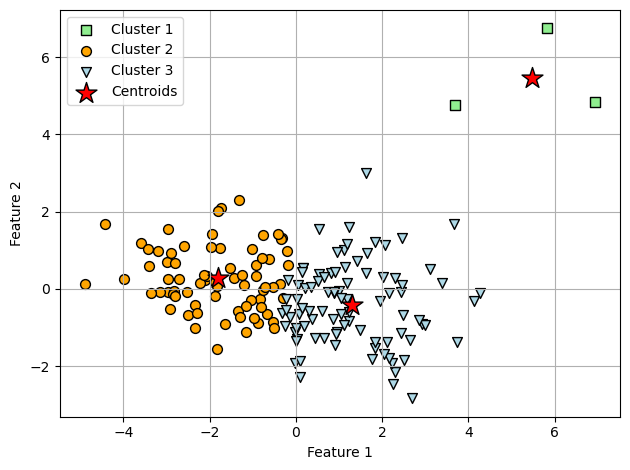

In [79]:
cond1 = y_km == 0
cond2 = y_km == 1
cond3 = y_km == 2


plt.scatter(country1_reduced[cond1, 0], country1_reduced[cond1, 1], s = 50, c = 'lightgreen', marker = 's', edgecolor = 'black', label = 'Cluster 1')
plt.scatter(country1_reduced[cond2, 0], country1_reduced[cond2, 1], s = 50, c = 'orange', marker = 'o', edgecolor = 'black', label = 'Cluster 2')
plt.scatter(country1_reduced[cond3, 0], country1_reduced[cond3, 1], s = 50, c = 'lightblue', marker = 'v', edgecolor = 'black', label = 'Cluster 3')

# centroid 
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], s = 250, marker = '*', c = 'red', edgecolors = 'black', label = 'Centroids')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.legend()

plt.grid()

plt.tight_layout()

plt.show()